# Задача 2.2

Если канал может исправить $t$ ошибок, то вероятность ошибки при декодировании равна $$p_{err} = 1 - \sum\limits_{i=0}^t \binom{n}{i} p^i (1 - p)^{n - i}$$ где $p$ - переходная вероятность в ДСК.

In [85]:
from scipy.special import binom

def p_err(n, k, d, p):
    t = (d - 1) // 2
    return 1 - sum([binom(n, i) * p ** i * (1 - p) ** (n - i) for i in range(t + 1)])

In [86]:
import matplotlib.pyplot as plt

ns = list(range(8, 41, 2))
ks = list(range(4, 21))
ds = [4, 4, 4, 4, 5, 6, 6, 7, 8, 7, 8, 8, 8, 8, 8, 9, 10]

def add_plot_with_err(p):
    errs = [p_err(ns[i], ks[i], ds[i], p) for i in range(len(ns))]
    plt.semilogy(ns, errs, marker=".", linewidth=1.7, label="p = {}".format(p))

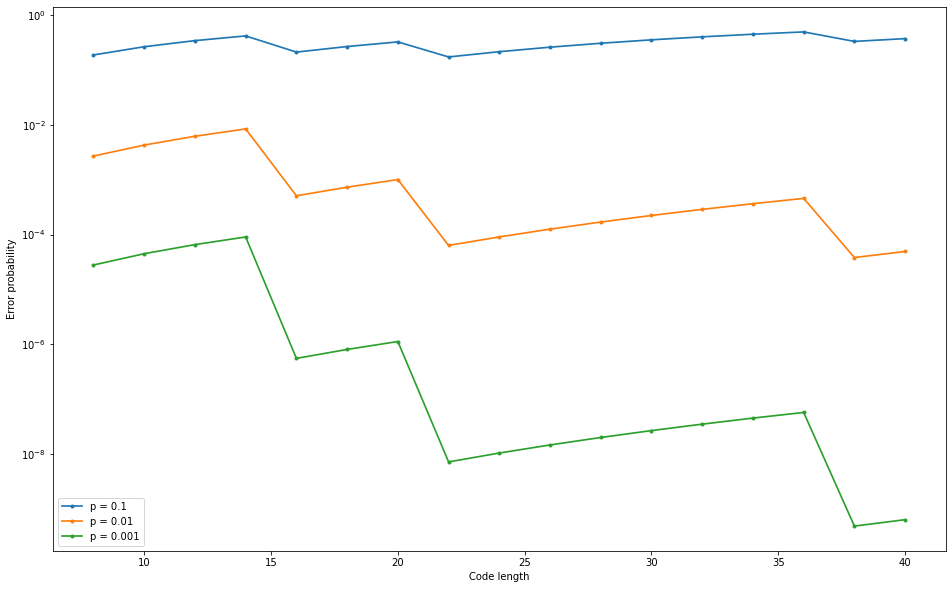

In [88]:
plt.figure(figsize=(16, 10))
add_plot_with_err(0.1)
add_plot_with_err(0.01)
add_plot_with_err(0.001)

plt.xlabel('Code length')
plt.ylabel('Error probability')
plt.legend()
plt.show()

$P_b = Q\left(\sqrt{\dfrac{2E_b}{N_0}}\right)$

Мы знаем, что $P_b = 10^{-5}$. Найдем $\sqrt{\dfrac{2E_b}{N_0}}$

In [89]:
from scipy.special import erfc
import numpy as np

def Q(x): return erfc(x / np.sqrt(2)) / 2

def find_x(p):
    l = 0
    r = 10
    while np.fabs(r - l) > 1e-15:
        m = (r + l) / 2
        if Q(m) > p:
            l = m
        else:
            r = m
    return (l + r) / 2

In [90]:
p = 1e-5
x = find_x(p)
print("{} = Q({})".format(p, x))
E0N0 = x ** 2 / 2

1e-05 = Q(4.2648907939228256)


$\sqrt{\dfrac{2E_b}{N_0}} = 4.265$. Значит $\dfrac{E_b}{N_0} = 9.095$ 

Тогда теоретический выигрыш кодирования равен $\dfrac{E_b}{N_0} - \dfrac{E_s}{N_0} = 9.095 - (-1.59) = 10.685$ Дб 